In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from mpl_toolkits.mplot3d import Axes3D

In [99]:
df_edges =pd.read_csv('df_edges.csv')
df_nodes =pd.read_csv('n_node_df.csv')
df_nodes['location'] = df_nodes['location'].apply(ast.literal_eval)
df_nodes['name_lane'] = df_nodes.apply(lambda row: row['Name'] + ' ' + str(row['lane_id']), axis=1)
df_nodes['rotation'] = df_nodes['rotation'].apply(ast.literal_eval)

In [67]:
frame_l = df_nodes['id'].unique()

In [119]:
def plot_location(df):
    x_coords = [loc[0] for loc in df['location']]
    y_coords = [loc[1] for loc in df['location']]
    car_names = df['name_lane']

    # Plotting the x and y coordinates on a scatter plot
    plt.scatter(x_coords, y_coords)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter Plot (X vs Y)')
    plt.grid(True)

    # Add car names as annotations to the points
    for i, name in enumerate(car_names):
        plt.annotate(name, (x_coords[i], y_coords[i]), textcoords='offset points', xytext=(0, 10), ha='center')

    plt.show()

In [105]:
def plot_vector(df):
    x_coords = [loc[0] for loc in df['location']]
    y_coords = [loc[1] for loc in df['location']]
    car_names = df['name_lane']
    # Extract rotation values
    rotations = df['rotation']

    # Create a scatter plot of car locations
    plt.scatter(x_coords, y_coords, color='blue', label='Car Location')

    # Plot the direction vector as arrows
    for x, y, rotation in zip(x_coords, y_coords, rotations):
        dx = rotation[0]
        dy = rotation[1]
        plt.arrow(x, y, dx, dy, head_width=1, head_length=2, fc='red', ec='red')
    for i, name in enumerate(car_names):
        plt.annotate(name, (x_coords[i], y_coords[i]), textcoords='offset points', xytext=(0, 10), ha='center')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Car Location and Direction')
    plt.legend()
    plt.grid(True)
    plt.show()

In [91]:
def plot_3d(df):
    x_coords = [loc[0] for loc in df['location']]
    y_coords = [loc[1] for loc in df['location']]
    z_coords = [loc[2] for loc in df['location']]
    car_names = df['name_lane']

    # Create a 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(x_coords, y_coords, z_coords)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Scatter Plot (X, Y, Z)')

    # Add car names as notations to the points
    for i, name in enumerate(car_names):
        ax.text(x_coords[i], y_coords[i], z_coords[i], name, color='red')

    ax.view_init(elev=10, azim=90)

    plt.show()

In [125]:
s_df =df_nodes[df_nodes['id']==frame_l[80]]
s_df

,Name,name,velocity_abs,abs_velocity_diff,location,abs_distance,lane_id,road_id,id,isEgo,rotation,car_id,name_lane
526,ego car,Mercedes-Benz Coupe,13,0.000000,"[38, 16, 11]",0.000000,-1.0,39.0,"(1, 17840836)",True,"[-176, 0, 0]","('ego car', (1, 17840836))",ego car -1.0
527,car_6304,Chevrolet Impala,11,88.283634,"[-50, 9, 10]",88.283634,-3.0,39.0,"(1, 17840836)",False,"[-179, 0, -1]","('car_6304', (1, 17840836))",car_6304 -3.0
528,car_6313,Mercedes-Benz Coupe,41,19.313208,"[56, 9, 11]",19.313208,-3.0,39.0,"(1, 17840836)",False,"[179, 0, 0]","('car_6313', (1, 17840836))",car_6313 -3.0
529,car_6322,Nissan Patrol,46,50.099900,"[-12, 13, 10]",50.099900,-2.0,39.0,"(1, 17840836)",False,"[-179, 0, 0]","('car_6322', (1, 17840836))",car_6322 -2.0
530,car_6480,Mustang Mustang,30,11.224972,"[33, 6, 10]",11.224972,-4.0,39.0,"(1, 17840836)",False,"[-179, 0, 0]","('car_6480', (1, 17840836))",car_6480 -4.0
531,car_6513,Audi Tt,41,17.291616,"[55, 13, 10]",17.291616,-2.0,39.0,"(1, 17840836)",False,"[179, 0, 0]","('car_6513', (1, 17840836))",car_6513 -2.0
532,car_6545,Chevrolet Impala,33,40.620192,"[-2, 9, 10]",40.620192,-3.0,39.0,"(1, 17840836)",False,"[-179, 0, 0]","('car_6545', (1, 17840836))",car_6545 -3.0
533,car_6547,Citroen C3,39,43.011626,"[-5, 16, 10]",43.011626,-1.0,39.0,"(1, 17840836)",False,"[-179, 0, 0]","('car_6547', (1, 17840836))",car_6547 -1.0


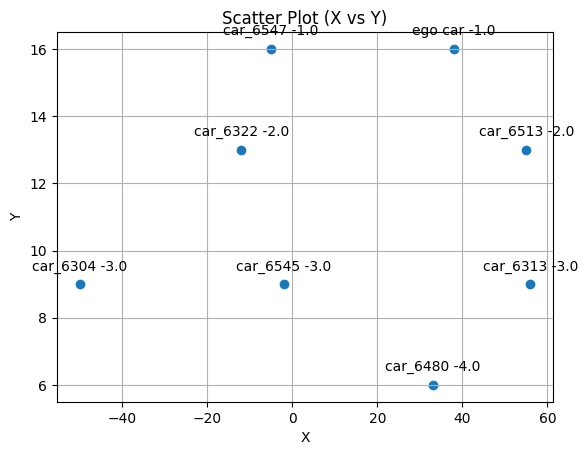

In [126]:
plot_location(s_df)

In [51]:
df_nodes.head()

,Name,name,velocity_abs,abs_velocity_diff,location,abs_distance,lane_id,road_id,id,isEgo,car_id,Index,scene_id,frame_id
0,ego car,Lincoln Mkz2017,25,0.000000,"[-5, 290, 0]",0.000000,-1.0,46.0,"(0, 17794829)",True,"('ego car', (0, 17794829))",0,0,17794829
1,car_6083,Nissan Patrol,23,2.828427,"[-3, 292, 0]",2.828427,-2.0,46.0,"(0, 17794829)",False,"('car_6083', (0, 17794829))",1,0,17794829
2,car_5820,Jeep Wrangler Rubicon,1,78.638413,"[5, 212, 0]",78.638413,-1.0,46.0,"(0, 17794829)",False,"('car_5820', (0, 17794829))",2,0,17794829
3,car_5845,Audi Etron,17,92.417531,"[16, 200, 0]",92.417531,-4.0,46.0,"(0, 17794829)",False,"('car_5845', (0, 17794829))",3,0,17794829
4,car_5874,Mini Cooperst,30,6.082763,"[1, 291, 0]",6.082763,-3.0,46.0,"(0, 17794829)",False,"('car_5874', (0, 17794829))",4,0,17794829


In [63]:
s_df_edge = df_edges[df_edges['id']==frame_l[100]]
merged_df = pd.merge(s_df_edge, df_nodes[['Name','id','lane_id']], left_on=['id','Node_1'], right_on= ['id','Name'],suffixes=('', '_Node_1'))
merged_df = pd.merge(merged_df, df_nodes[['Name','id','lane_id']], left_on=['id','Node_2'], right_on= ['id','Name'],suffixes=('', '_Node_2'))
merged_df['lane_id_diff'] = merged_df.apply(lambda row: row['lane_id'] -row['lane_id_Node_2'], axis=1)
merged_df =  merged_df.sort_values(by='label')
merged_df[['id','Node_1','Node_2','label','lane_id','lane_id_Node_2','lane_id_diff']]

#merged_df[['id','Node_1','Node_2','label',]]

,id,Node_1,Node_2,label,lane_id,lane_id_Node_2,lane_id_diff
4,"(1, 17840856)",ego car,car_6480,atDRearOf,-1.0,-4.0,3.0
1,"(1, 17840856)",ego car,car_6313,atSRearOf,-1.0,-3.0,2.0
7,"(1, 17840856)",ego car,car_6513,atSRearOf,-1.0,-2.0,1.0
13,"(1, 17840856)",car_6480,ego car,inDFrontOf,-4.0,-1.0,-3.0
16,"(1, 17840856)",car_6513,ego car,inSFrontOf,-2.0,-1.0,-1.0
10,"(1, 17840856)",car_6313,ego car,inSFrontOf,-3.0,-1.0,-2.0
0,"(1, 17840856)",ego car,car_6313,near,-1.0,-3.0,2.0
15,"(1, 17840856)",car_6513,ego car,near,-2.0,-1.0,-1.0
3,"(1, 17840856)",ego car,car_6480,near,-1.0,-4.0,3.0
6,"(1, 17840856)",ego car,car_6513,near,-1.0,-2.0,1.0


In [140]:
print(df_edges[(df_edges['id'] == '(1, 17840856)') & df_edges['label'].str.contains('Rear')].sort_values('label'))
print(df_edges[(df_edges['id'] == '(1, 17840856)') & df_edges['label'].str.contains('Fr')].sort_values('label'))


                 id   Node_1    Node_2  value      label
2330  (1, 17840856)  ego car  car_6480      3  atDRearOf
2327  (1, 17840856)  ego car  car_6313      4  atSRearOf
2333  (1, 17840856)  ego car  car_6513      4  atSRearOf
                 id    Node_1   Node_2  value       label
2347  (1, 17840856)  car_6480  ego car      1  inDFrontOf
2341  (1, 17840856)  car_6313  ego car      2  inSFrontOf
2352  (1, 17840856)  car_6513  ego car      2  inSFrontOf


In [129]:
t_df  =df_nodes[df_nodes['id']=='(1, 17840856)']

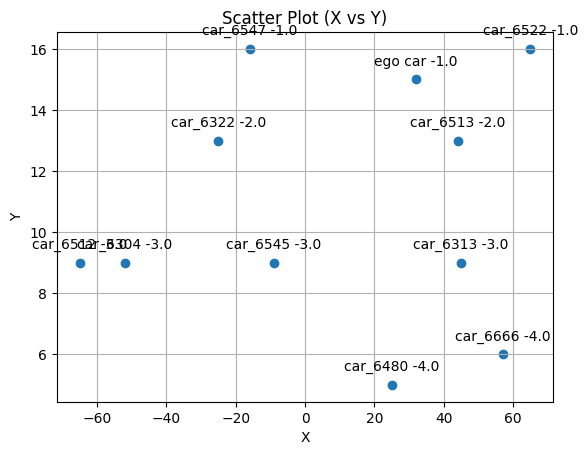

In [130]:
t_df  =df_nodes[df_nodes['id']=='(1, 17840856)']
plot_location(t_df)

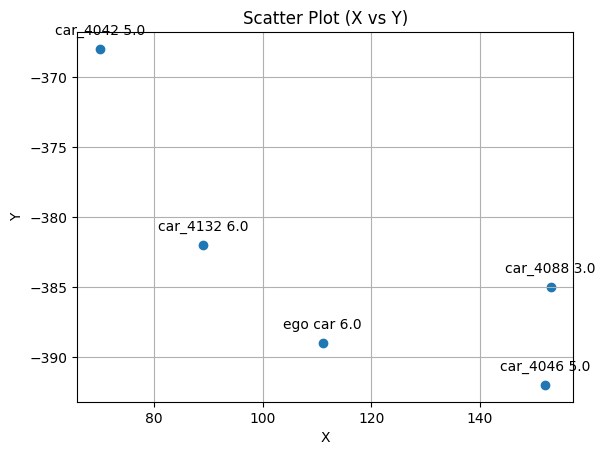

In [143]:
t_df  =df_nodes[df_nodes['id']=='(270, 30421908)']
plot_location(t_df)

In [142]:
print(df_edges[(df_edges['id'] == '(270, 30421908)') & df_edges['label'].str.contains('Rear')].sort_values('label'))
print(df_edges[(df_edges['id'] == '(270, 30421908)') & df_edges['label'].str.contains('Fr')].sort_values('label'))


                     id    Node_1    Node_2  value      label
377305  (270, 30421908)   ego car  car_4132      4  atSRearOf
377314  (270, 30421908)  car_4132   ego car      4  atSRearOf
Empty DataFrame
Columns: [id, Node_1, Node_2, value, label]
Index: []


In [148]:
de_isIn = df_edges[(df_edges['label'] == 'isIn') & df_edges['Node_1'].str.contains('car') & df_edges['Node_2'].str.contains('car')]

In [163]:
de_isIn = df_edges[(df_edges['label'] == 'isIn') ]
de_isIn[de_isIn['id']=='(0, 17794829)']

,id,Node_1,Node_2,value,label
0,"(0, 17794829)",ego car,lane_middle,0,isIn
7,"(0, 17794829)",lane_left,Root Road,0,isIn
8,"(0, 17794829)",lane_right,Root Road,0,isIn
9,"(0, 17794829)",lane_middle,Root Road,0,isIn
10,"(0, 17794829)",car_6083,lane_middle,0,isIn
14,"(0, 17794829)",car_5820,lane_left,0,isIn
15,"(0, 17794829)",car_5845,lane_left,0,isIn
16,"(0, 17794829)",car_5874,lane_middle,0,isIn


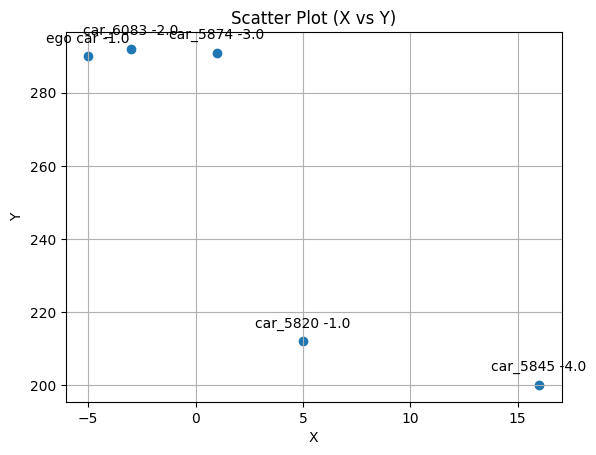

In [166]:
t_df  =df_nodes[df_nodes['id']=='(0, 17794829)']
plot_location(t_df)

In [177]:
df_edges['near_level'] = 0 
df_edges.loc[df_edges['label'] == 'near_coll', 'near_level'] = 5
df_edges.loc[df_edges['label'] == 'super_near', 'near_level'] = 4
df_edges.loc[df_edges['label'] == 'very_near', 'near_level'] = 3
df_edges.loc[df_edges['label'] == 'near', 'near_level'] = 2
df_edges.loc[df_edges['label'] == 'visible', 'near_level'] = 1
df_edges.to_csv('df_edges.csv', index=False)